In [3]:
import sys
sys.path.append('..')

import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision.transforms import transforms
import torch
import skimage.transform
from src.datasets.city import City
from src.datasets.utils import recursive_glob, Compose, RandomHorizontallyFlip, RandomRotate, Scale

(1024, 2048, 3)
(1024, 2048)
[0.         0.00392157 0.01176471 0.01568628 0.02352941 0.02745098
 0.03137255 0.04313726 0.06666667 0.07450981 0.07843138 0.08235294
 0.08627451 0.09019608 0.09411765 0.10196079]


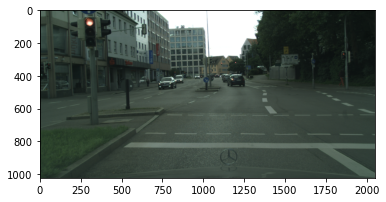

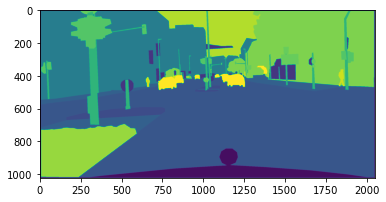

In [4]:
img_dir = '../data/leftImg8bit'
mask_dir = '../data/gtFine'

img_ex = '/train/ulm/ulm_000049_000019_leftImg8bit.png'
mask_ex = '/train/ulm/ulm_000049_000019_gtFine_labelIds.png'

img = plt.imread(img_dir + img_ex)
mask = plt.imread(mask_dir + mask_ex)

plt.figure()
plt.imshow(img)
print(img.shape)

plt.figure()
plt.imshow(mask)
print(mask.shape)
print(np.unique(mask))

(1024, 2048, 3)
(1024, 2048)
[0.00392157 0.01176471 0.01568628 0.01960784 0.02352941 0.02745098
 0.03137255 0.04313726 0.06666667 0.07450981 0.07843138 0.08235294
 0.08627451 0.09019608 0.09411765 0.10196079 0.1254902  0.12941177]


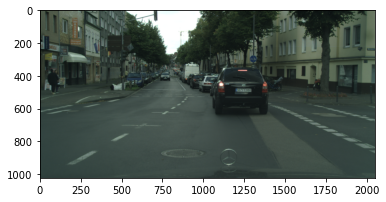

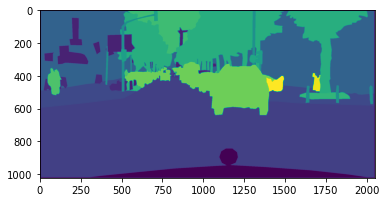

In [5]:
img_dir = '../data/leftImg8bit'
mask_dir = '../data/gtFine'

img_ex = '/train/cologne/cologne_000001_000019_leftImg8bit.png'
mask_ex = '/train/cologne/cologne_000001_000019_gtFine_labelIds.png'

img = plt.imread(img_dir + img_ex)
mask = plt.imread(mask_dir + mask_ex)

plt.figure()
plt.imshow(img)
print(img.shape)

plt.figure()
plt.imshow(mask)
print(mask.shape)
print(np.unique(mask))

In [6]:
# augmentations = Compose([Scale(2048), RandomRotate(10), RandomHorizontallyFlip(0.5)])

local_path = "../data"
dst = City(local_path, is_transform=True)

Found 2975 train images


torch.Size([3, 256, 512])
torch.Size([256, 512])
torch.Size([256, 512])


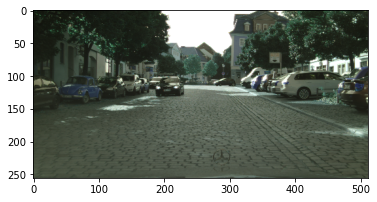

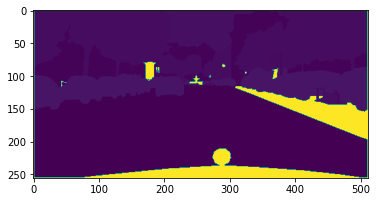

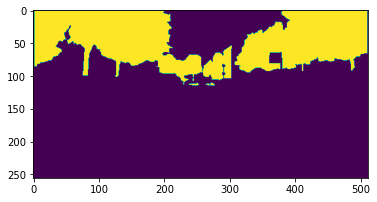

In [7]:
i = 2

img = dst[i]['image']
mask = dst[i]['mask']

plt.figure()
plt.imshow(img.permute(1,2,0).detach().numpy());
print(img.shape)

plt.figure()
print(mask.shape)
plt.imshow(mask.numpy());

plt.figure()
print(mask.shape)
plt.imshow((mask.numpy()==8));

In [10]:
m = mask.numpy()
print(np.unique(m))

[  0   2   5   7   8   9  10  11  13  18 250]


In [13]:
mask_inds = []
for b in dst:
    m = b['mask'].numpy()
    mask_inds += list(np.unique(m))

WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes
WARN: resizing labels yielded fewer classes


In [16]:
len(list(set(mask_inds)))

20